In [27]:
%store -r preprocessed_data
%store -r lemmatized_data
%store -r cleaned_data

**NLP with LDA**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the preprocessed data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_data)

# Apply LDA for topic modeling
num_topics = 10  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

n_top_words = 7  # Adjust the number of top words to display
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)

Topic #1: stage data phone night io assistance deep
Topic #2: score restless sensitive setting log awake set
Topic #3: awake turn premium tap alarm mode wake
Topic #4: morning rem feel tired flex deep record
Topic #5: setting tv people doctor room havent feel
Topic #6: exercise case drink help caffeine question fall
Topic #7: deep apnea study stage sleeping tracker thought
Topic #8: device wrist sleeping health forum idea moving
Topic #9: work tracking wake graph outeat forum score
Topic #10: heart rate resting work feature device data


**Sentiment Analysis**

In [29]:
import textblob
from textblob import TextBlob

# Analyze sentiment for each paragraph
sentiments = [TextBlob(text).sentiment for text in preprocessed_data]
sentiments2 = [TextBlob(text).sentiment for text in cleaned_data]

In [30]:
sentiments

[Sentiment(polarity=0.16, subjectivity=0.5399999999999999),
 Sentiment(polarity=0.16, subjectivity=0.5399999999999999),
 Sentiment(polarity=0.16, subjectivity=0.5399999999999999),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.25, subjectivity=0.25),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.05, subjectivity=0.7),
 Sentiment(polarity=-0.16666666666666666, subjectivity=0.5),
 Sentiment(polarity=1.1102230246251566e-17, subjectivity=0.4352380952380953),
 Sentiment(polarity=0.2, subjectivity=0.44999999999999996),
 Sentiment(polarity=0.03333333333333333, subjectivity=0.22205128205128205),
 Sentiment(polarity=-0.016666666666666663, subjectivity=0.42040816326530617),
 Sentiment(polarity=-0.13333333333333333, subjectivity=0.6),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Senti

**WordCloud**

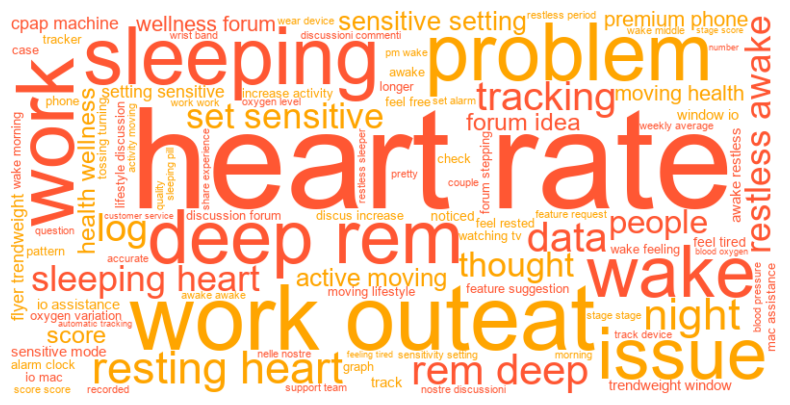

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# join text
your_text_corpus = ' '.join(preprocessed_data)

# Define a color scale as a list of colors
color_scale = []

# Create a function to map words to colors based on a color scale
def color_scale_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Determine the index of the color to use based on word length
    color_index = len(word) % len(color_scale)
    return color_scale[color_index]

# Create a WordCloud object using the Arial font
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,
                      collocation_threshold=5, font_path='arial.ttf', color_func=color_scale_func).generate(your_text_corpus)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')


In [32]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from heapq import nlargest
import nltk
nltk.download("stopwords")
# Load spaCy model
# download python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3016807 # or even higher
doc = nlp('\n'.join(cleaned_data))
# Flatten the list of lists into a single list of words
flattened_tokens = [word for sublist in lemmatized_data for word in sublist]

# Calculate word frequency
word_freq = {}
for word in flattened_tokens:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Calculate sentence scores based on word frequency
sentence_scores = {}
for sent in doc.sents:
    for word in sent:
        if word.text in word_freq:
            if sent in sentence_scores:
                sentence_scores[sent] += word_freq[word.text]
            else:
                sentence_scores[sent] = word_freq[word.text]

# Get the top N sentences as the summary
summary_sentences = nlargest(1, sentence_scores, key=sentence_scores.get)

# Generate the summary
summary = " ".join([str(sentence) for sentence in summary_sentences])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dc78udot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

In [34]:
sorted_word_freq

{'awake': 1232,
 'work': 1205,
 'wake': 1032,
 'heart': 1009,
 'score': 993,
 'sleeping': 977,
 'deep': 963,
 'rate': 955,
 'data': 948,
 'device': 872,
 'stage': 871,
 'tracking': 759,
 'feel': 741,
 'rem': 729,
 'problem': 718,
 'log': 691,
 'issue': 689,
 'restless': 688,
 'tracker': 680,
 'setting': 670,
 'night': 659,
 'morning': 641,
 'phone': 619,
 'graph': 606,
 'track': 564,
 'set': 555,
 'sensitive': 548,
 'pattern': 539,
 'forum': 517,
 'people': 514,
 'average': 503,
 'mode': 493,
 'slept': 466,
 'record': 460,
 'doctor': 454,
 'feature': 450,
 'help': 443,
 'great': 432,
 'apnea': 428,
 'fall': 423,
 'idea': 422,
 'accurate': 398,
 'step': 390,
 'flex': 372,
 'tired': 371,
 'health': 370,
 'thought': 364,
 'period': 364,
 'year': 364,
 'movement': 358,
 'activity': 357,
 'wrist': 352,
 'check': 351,
 'premium': 350,
 'study': 348,
 'question': 343,
 'wear': 339,
 'waking': 333,
 'watch': 324,
 'number': 319,
 'alarm': 305,
 'update': 305,
 'pm': 303,
 'moving': 302,
 'star

In [35]:
with open("summary.txt", 'w', encoding='utf-8') as file:
    # Write the string to the file
    file.write(summary)